**NLP**


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import numpy
import seaborn as sns
train = pd.read_csv("dreaddit-train.csv")
test = pd.read_csv("dreaddit-test.csv")

In [2]:
print(train.columns)
print(train.shape)

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(2838, 116)


In [3]:
print(test.columns)
print(test.shape)

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(715, 116)


In [4]:
train.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

In [5]:
test.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

In [6]:
train.subreddit.value_counts()

subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64

In [7]:
test.subreddit.value_counts()

subreddit
anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: count, dtype: int64

In [8]:
train = train.drop(['post_id', 'sentence_range', 'id'], axis = 1)
test = test.drop(['post_id', 'sentence_range', 'id'], axis = 1)

In [9]:
df = pd.concat([train,test],axis=0,ignore_index=True)
df = df.sample(frac = 1).reset_index(drop = True)
df.head()

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,anxiety,- Effexor XR My doctor says it's basically a c...,0,0.571429,1.508889e+09,1,5.015000,39,49.96,60.13,...,1.1429,1.3333,1.0,1.80760,1.60000,1.90192,1.00,3,6.766905,-0.010000
1,relationships,I'm gonna try and keep this as short as possib...,1,0.600000,1.515150e+09,1,3.549444,104,40.01,94.88,...,1.0000,1.1429,1.0,1.69539,1.56703,1.86522,1.00,4,4.425000,0.074242
2,domesticviolence,But Someone asked me if I needed a shirt and g...,0,1.000000,1.504107e+09,6,2.344643,82,7.93,23.22,...,1.0000,1.3000,1.0,1.76859,1.58630,1.85497,1.00,15,3.559048,0.500000
3,assistance,I'm completely devastated. My cat was just hit...,1,0.800000,1.530831e+09,5,0.673483,60,12.41,9.13,...,1.4286,1.3333,1.0,1.64944,1.56735,1.86816,0.69,6,3.206791,-0.050000
4,homeless,I cant take video of him due to the lights aim...,0,0.571429,1.532967e+09,15,7.054805,158,63.08,9.20,...,1.1250,1.1429,1.0,1.67821,1.60154,1.82881,0.85,20,7.405281,-0.035370


In [10]:
print(df.isnull().sum())

subreddit                   0
text                        0
label                       0
confidence                  0
social_timestamp            0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 113, dtype: int64


In [11]:
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [12]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

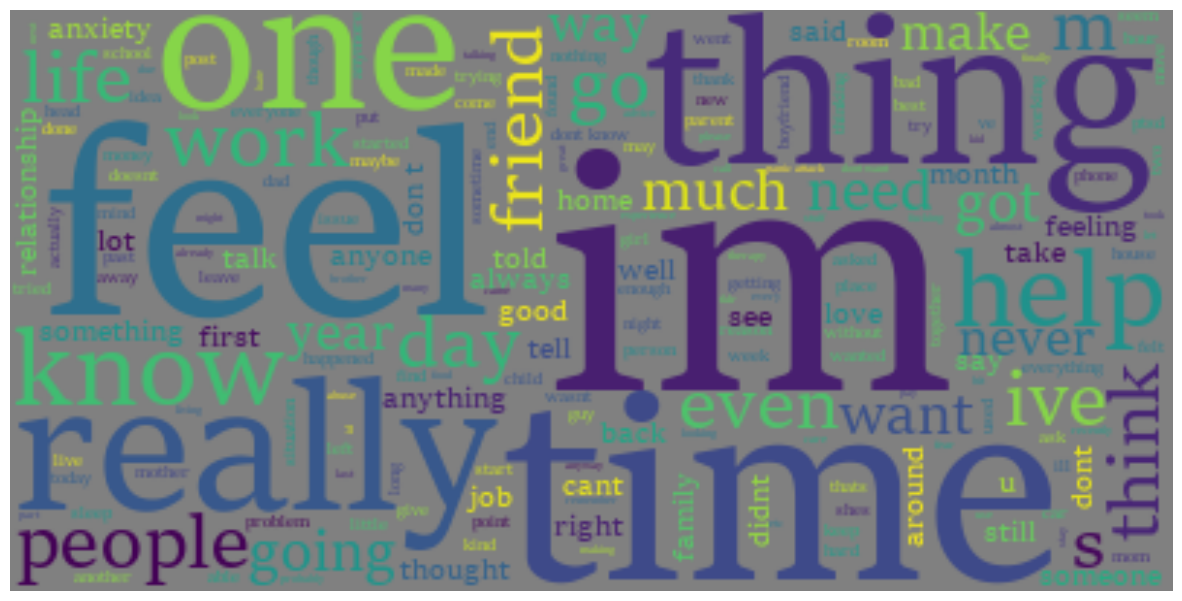

In [13]:
#!pip install --upgrade wordcloud matplotlib
#!pip uninstall numpy matplotlib
#!pip install numpy==1.20.3 matplotlib==3.4.3
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Use a common TrueType font available on your system, for example 'arial.ttf'
font_path = '/Users/siddharthagarwal/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/Sitka Subheading/23569166544.ttf'  # Replace with the actual path to 'arial.ttf'

text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="grey", font_path=font_path).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
df["label"] = df["label"].map({0: "No Stress ", 1: "Stress"})
df = df[["text", "label"]]
print(df.head())

                                                text       label
0   effexor xr doctor say basically crap shoot di...  No Stress 
1  im gonna try keep short possible met  month ag...      Stress
2  someone asked needed shirt gave one asked call...  No Stress 
3  im completely devastated cat hit killed car do...      Stress
4  cant take video due light aimed wrong directio...  No Stress 


/Users/siddharthagarwal/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


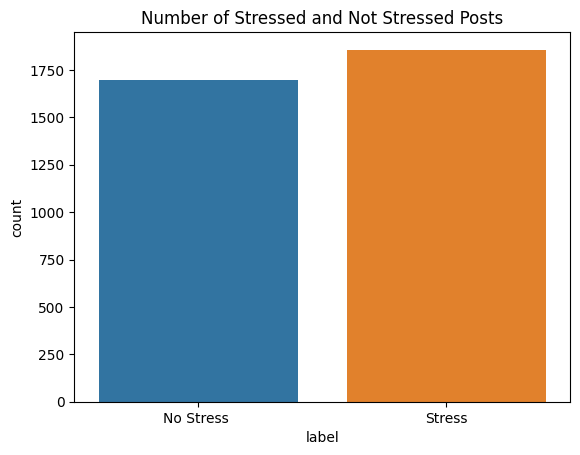

In [15]:
#sns.countplot(df.label)
#plt.xlabel('label')
#plt.title('number of stressed and not stressed posts')
df['label'] = df['label'].astype('category')

# Create a count plot
sns.countplot(data=df, x='label')

# Set labels and title
plt.xlabel('label')
plt.title('Number of Stressed and Not Stressed Posts')

# Show the plot
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(df["text"])
y = np.array(df["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.33,
                                                random_state=42)

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

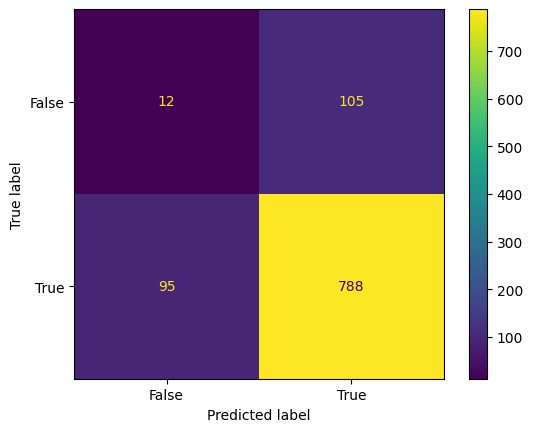

In [18]:
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()dcvx
plt.show()

In [24]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: dont talk to me
['Stress']


In [33]:
TN, FP, FN, TP = confusion_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = (TP) / (TP+FP)
recall=(TP) / (TP+FN)
print("Accuracy:", accuracy*100,"%")
print("Precision:", precision*100,"%")
print("Recall:", recall*100,"%")

Accuracy: 80.0 %
Precision: 88.24188129899217 %
Recall: 89.24122310305775 %
